<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/015%20-%20Lesson%2015%20(Hunting%20Exoplanets%20In%20Space%20-%20Scatter%20%26%20Line%20Plots).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 15: Hunting Exoplanets In Space - Scatter & Line Plots

### Teacher-Student Activities

In the last class, we learnt the principle behind the **transit method** of finding exoplanets in space. We also learnt how to create Pandas DataFrames, how to find the number of rows and columns in a DataFrame, how to check for the missing values and how to slice a DataFrame using the `iloc[]` function.

In this class, we will create **scatter plots** and **line plots** to visualise the fluctuations in the brightness levels (or flux values) of the light emitted by the stars.

- If there is a periodic dip in the brightness levels, then we can say that the star has at least one planet. This star is labelled as `2`.

-  If there is no clear periodic dip in the brightness levels, then we could say that the star has no planet. In the datasets, such stars are labelled as `1`.

The `exo_train_df` has 5087 rows and 3198 columns. Each row denotes a star. The `LABEL` column tells the label or the classification of the star, i.e., whether it has at least one planet or at most one planet. The remaining 3197 columns, i.e., the columns `FLUX.1` to `FLUX.3197` contain the brightness levels for each star. A brightness level is a floating-point value which could be either positive, negative or zero. *For the time being, do not worry about the negative brightness levels.*

We will create the scatter plots and line plots for three stars labelled as `2` and three stars labelled as `1`.

As far as data analysis is concerned, you do not have to create a DataFrame for the test dataset. So, in this lesson, we will not create a DataFrame for `exoTest.csv` file.

Let's run all the codes in the code cells that we have already covered in the previous class and begin this class from the **Activity 1: Scatter And Line Plots For First 3 Stars** section. You too run the code cells until the first activity.


---

#### Loading The Training Dataset

Dataset links (Don't click on them):

1. Train dataset
   
   https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv

2. Test dataset
   
   https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv

In [ ]:
exo_test_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv')
exo_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [ ]:
exo_test_df.shape

(570, 3198)

In [ ]:
exo_test_df['LABEL'].value_counts()

1    565
2      5
Name: LABEL, dtype: int64

In [ ]:
# Load the training dataset.
import pandas as pd

exo_train_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv')
exo_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
# Check the number of rows and columns in the 'exo_train_df'.
exo_train_df.shape

(5087, 3198)

---

#### Check For The Missing Values


In [ ]:
# Find the total number of missing values in the 'exo_train_df'.
num_missing_values = 0

for column in exo_train_df.columns:
  for item in exo_train_df[column].isnull():
    if item == True:
      num_missing_values += 1

num_missing_values

0

There are no missing values in the DataFrame.

---

#### Slicing A DataFrame Using The `iloc[]` Function
Create Pandas series for the first 3 stars and the last 3 stars in the DataFrame.

In [ ]:
# Create a Pandas series for the first star and store it in a variable called 'star_0'.
star_0 = exo_train_df.iloc[0, :]
star_0.head()

LABEL      2.00
FLUX.1    93.85
FLUX.2    83.81
FLUX.3    20.10
FLUX.4   -26.98
Name: 0, dtype: float64

**Syntax:**

`dataframe_name.iloc[row_position_start : row_position_end, column_position_start : column_position_end]`

In this syntax:

- `row_position_start` denotes the position of the row in the DataFrame **starting** from whose values you want to take in the new Pandas series or DataFrame.
- `row_position_end` denotes the position of the row in the DataFrame till whose values you want to take in the new Pandas series or DataFrame.
- `column_position_start` denotes the position of the column in the DataFrame **starting** from whose values you want to take in the new Pandas series or DataFrame.
- `column_position_end` denotes the position of the column in the DataFrame till whose values you want to take in the new Pandas series or DataFrame.

You can verify manually whether we have extracted the values from the first row or not by viewing the first 5 rows of the DataFrame using the `head()` function.

In [ ]:
# Create a Pandas series for the second star and store it in a variable called 'star_1'.
star_1 = exo_train_df.iloc[1, :]
star_1.head()

LABEL      2.00
FLUX.1   -38.88
FLUX.2   -33.83
FLUX.3   -58.54
FLUX.4   -40.09
Name: 1, dtype: float64

In [ ]:
# Create a Pandas series for the third star and store it in a variable called 'star_2'.
star_2 = exo_train_df.iloc[2, :]
star_2.head()

LABEL       2.00
FLUX.1    532.64
FLUX.2    535.92
FLUX.3    513.73
FLUX.4    496.92
Name: 2, dtype: float64

In [ ]:
# Create a Pandas series for the last star and store it in a variable called 'star_5086'.
star_5086 = exo_train_df.iloc[5086, :]
star_5086.head()

LABEL       1.00
FLUX.1    323.28
FLUX.2    306.36
FLUX.3    293.16
FLUX.4    287.67
Name: 5086, dtype: float64

In [ ]:
# Create a Pandas series for the second-last star and store it in a variable called 'star_5085'.
star_5085 = exo_train_df.iloc[5085, :]
star_5085.head()

LABEL     1.00
FLUX.1    3.82
FLUX.2    2.09
FLUX.3   -3.29
FLUX.4   -2.88
Name: 5085, dtype: float64

In [ ]:
# Create a Pandas series for the third-last star and store it in a variable called 'star_5084'.
star_5084 = exo_train_df.iloc[5084, :]
star_5084.head()

LABEL       1.00
FLUX.1    273.39
FLUX.2    278.00
FLUX.3    261.73
FLUX.4    236.99
Name: 5084, dtype: float64

---

### Scatter and Line Plots of Flux

Now that we have Pandas series for the 3 stars labelled as `2` and 3 stars labelled as `1`, let's plot the **Flux** values on the  $y-axis$ for each observation for a star. On $x-axis$, we will plot numbers ranging from `1` to `3197`.


---

#### Activity 1: Scatter And Line Plots For First 3 Stars^

Let's plot the scatter plots and line plots for the first three planets in the `exo_train_df` DataFrame.

To make this plot,

1. We first need to import a Python module named `matplotlib.pyplot` with `plt` as an alias. This module is exclusively designed for creating graphs such as bar graphs, histogram, line plot, scatter plot etc. We will learn more about this module as we go on in this course. Meanwhile, you can read more about this module by clicking on the link provided in the **Activities** section under the title **The `matplotlib` Documentation**.

  ```
  import matplotlib.pyplot as plt
  ```

2. Then we need to call the `figure()` function from the `plt` module to resize the plot. The `figure()` function takes `figsize=(horizontal_width, vertical_height)` parameter as an input.  

  ```
  plt.figure(figsize=(16, 4))
  ```

3. Then we need either a Python list, a NumPy array or a Pandas series containing the numbers between `1` and `3197` to plot them on the $x-axis$.

  ```
  x_values_star_0 = np.arange(1, 3198)
  ```

4. Then we need `star_0` Pandas series to plot the `FLUX` values on the $y-axis$ for the first star in the DataFrame.

  ```
  y_values_star_0 = star_0[1:]
  ```

5. Then we need to call the `scatter()` function from the `plt` module with the required inputs as described in the third and the fourth steps.

  ```
  plt.scatter(x_values_star_0, y_values_star_0)
  ```

6. Finally, we need to call the `show()` function from the `plt` module.

  ```
  plt.show()
  ```

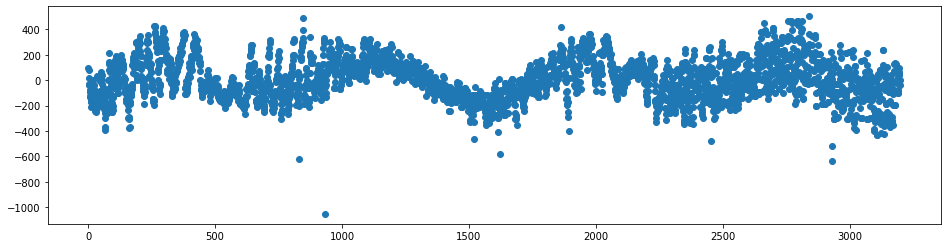

In [ ]:
# Teacher Action: Create a scatter plot for 'star_0' Pandas series.
# 1. Import the 'numpy' and 'matplotlib.pyplot' modules.
import numpy as np
import matplotlib.pyplot as plt
# 2. Call the 'figure()' function to resize the plot.
plt.figure(figsize = (16,4))
# Here, 16 means the plot is 16 units wide and 4 units high. Play with these numbers to draw different sized plots.

# Call the 'scatter()' function to make a scatter plot between the x and y values.
# The scatter() function requires two inputs: x and y where x is the data to be plotted on the x-axis and y is the data to be plotted on the y-axis.
# In our case, x is a Pandas series of numbers between 1 and 3197 and y is the 'FLUX' values for a star.
x_value = np.arange(1,3198)
y_value = star_0[1: ]

# Here, star_0[1:] is a Pandas series containing all the 'FLUX' values starting from the value at index 1 till the value at last index, i.e., 3197
# The 'arange(1, 3198)' function from the 'numpy' module will generate numbers from 1 to 3197.

# 3. Call the 'scatter()' function.
plt.scatter(x_value,y_value)
# 4. Call the 'show()' function.
plt.show()
# The 'show()' function displays the plot.

As we can see from the graph, there is a somewhat periodic downward peak in the brightness level recorded by the Kepler telescope for this star. This suggests that the first star in the DataFrame has at least one planet.

Let's draw the line plot also to see this fluctuation in a different manner.

To draw a line plot, you have to follow the same steps that you followed to create a scatter plot except in the fifth step, you have to call the `plot()` function instead of the `scatter()` function from the `plt` module.

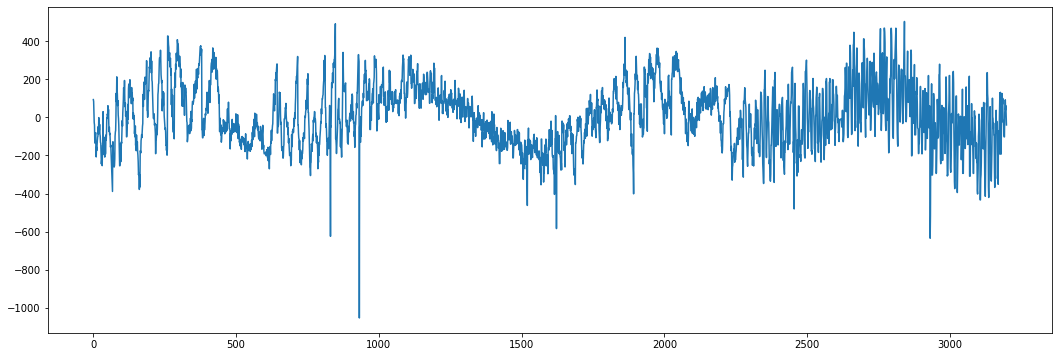

In [ ]:
# Teacher Action: Create a line plot for 'star_0' Pandas series.
# Line plot for the first star in the DataFrame.
plt.figure(figsize = (18,6))
# Call the plot(x, y) function to draw a line plot between the x and y values.
plt.plot(x_value,y_value)
plt.show()

In [ ]:
star_0.head()

LABEL      2.00
FLUX.1    93.85
FLUX.2    83.81
FLUX.3    20.10
FLUX.4   -26.98
Name: 0, dtype: float64

The line plot also confirms the periodic downward-peaks in the `FLUX` values.

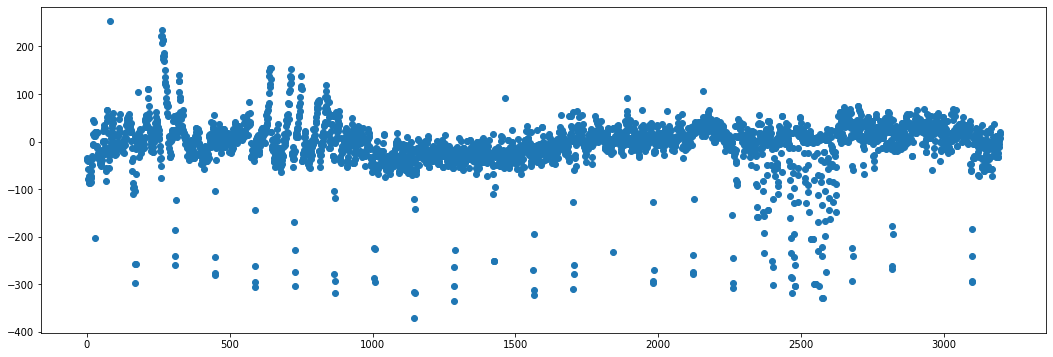

In [ ]:
# Student Action: Create a scatter plot for the second star, i.e., 'star_1'.
plt.figure(figsize = (18,6))
plt.scatter(x_value,star_1[1: ])
plt.show()

It is quite difficult to spot any clear pattern in the scatter plot for the second star in the DataFrame. Let's draw a line plot to identify a pattern.

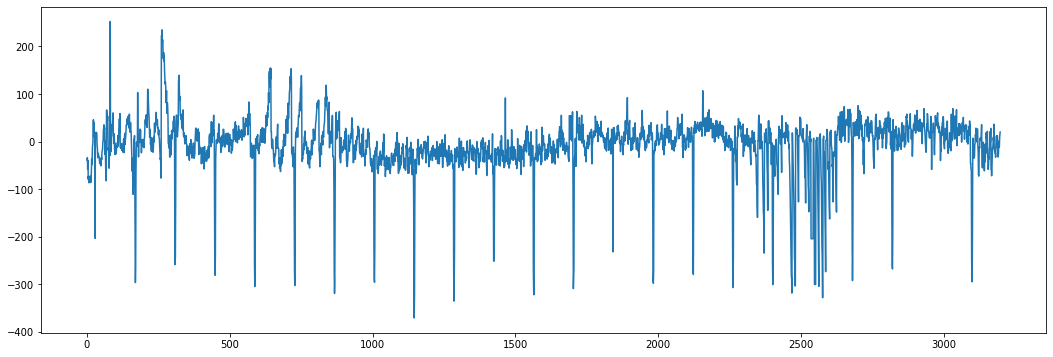

In [ ]:
# Student Action: Create a line plot for the second star, i.e., 'star_1'.
plt.figure(figsize = (18,6))
plt.plot(x_value,star_1[1: ])
plt.show()

As we can see, there are consistent sudden drops in the brightness levels for the second star in the DataFrame. This suggests that the planet is orbiting its star at very high radial speed. Also, the planet could be very close to the star.



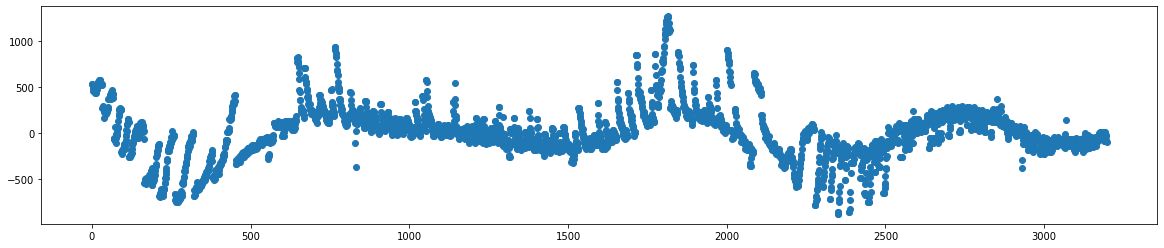

In [ ]:
# Student Action: Create a scatter plot for the third star, i.e., 'star_2'.
plt.figure(figsize = (20,4))
plt.scatter(x_value,star_2[1:])
plt.show()

Here also, we can spot a clear repetitive downward-peaks which confirms that the star has at least one planet.

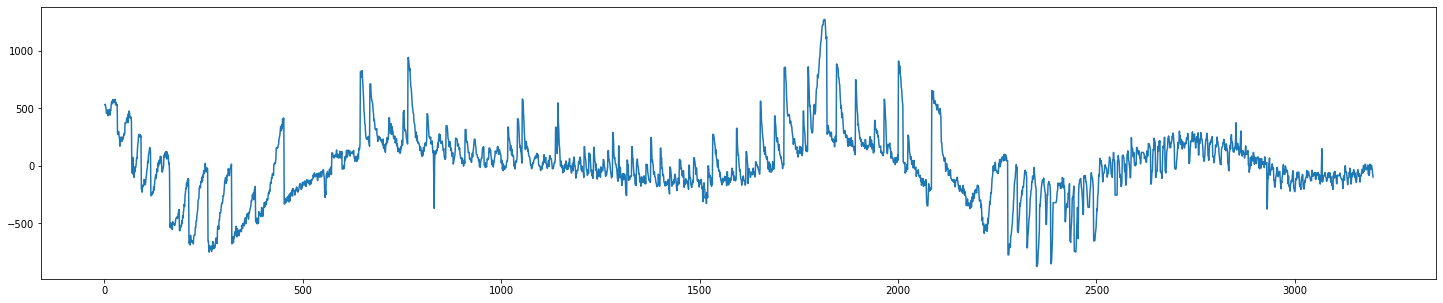

In [ ]:
# Student Action: Create a line plot for the third star, i.e, 'star_2'.
plt.figure(figsize = (25,5))
plt.plot(x_value,star_2[1: ])
plt.show()

In [ ]:
star_2.head()

LABEL       2.00
FLUX.1    532.64
FLUX.2    535.92
FLUX.3    513.73
FLUX.4    496.92
Name: 2, dtype: float64

The line plot also confirms the repetitive downward-peak pattern.

---

#### Activity 2: Scatter Plots And Line Plots For Last 3 Stars^^^
Now, let's create the scatter plots and line plots for the last three stars in the DataFrame which have been labelled or classified as `1`.

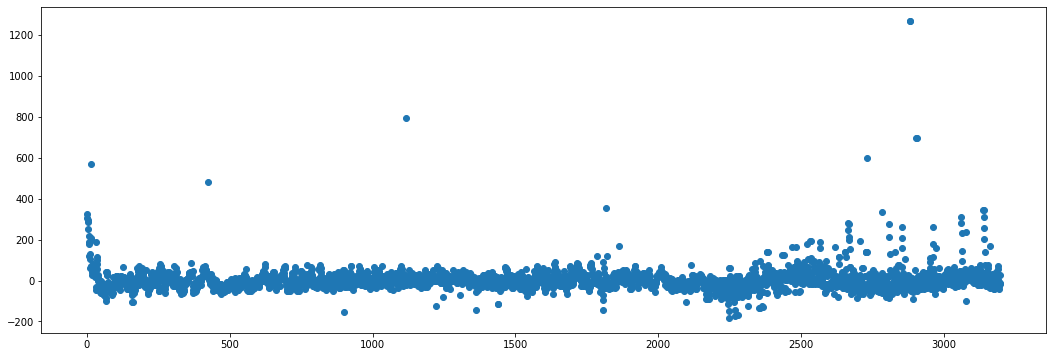

In [ ]:
# Student Action: Create a scatter plot for the last star, i.e., 'star_5086' in the DataFrame.
plt.figure(figsize = (18,6))
plt.scatter(x_value,star_5086[1: ])
plt.show()

As you can see, there is no clear periodic downward-peak in the brightness levels of the light emitted from the star. We cannot make a claim that the star has a planet orbiting it. Let's also create the line plot to confirm our inference.

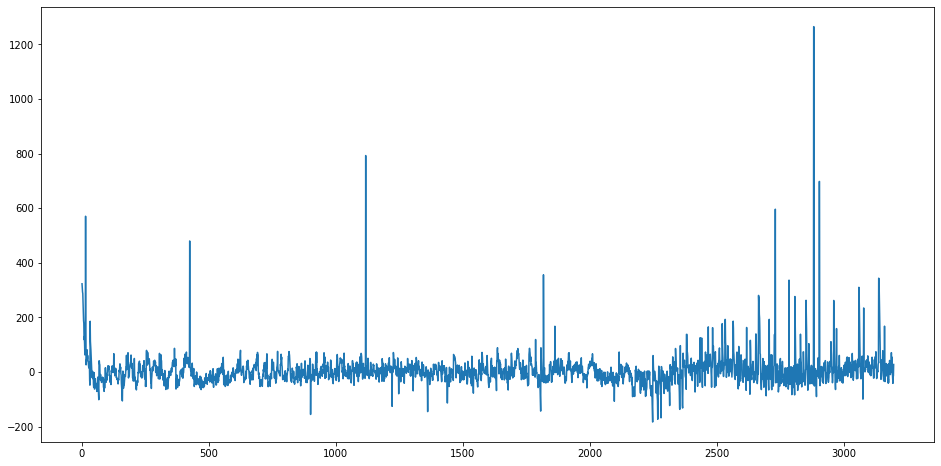

In [ ]:
# Student Action: Create a line plot for the last star, i.e, 'star_5086' in the DataFrame.
plt.figure(figsize = (16,8))
plt.plot(x_value,star_5086[1:])
plt.show()

In [ ]:
star_5086.head()

LABEL       1.00
FLUX.1    323.28
FLUX.2    306.36
FLUX.3    293.16
FLUX.4    287.67
Name: 5086, dtype: float64

There are some sudden spikes in the line plot but they exist at irregular intervals. So we cannot say for sure that the star has a planet.

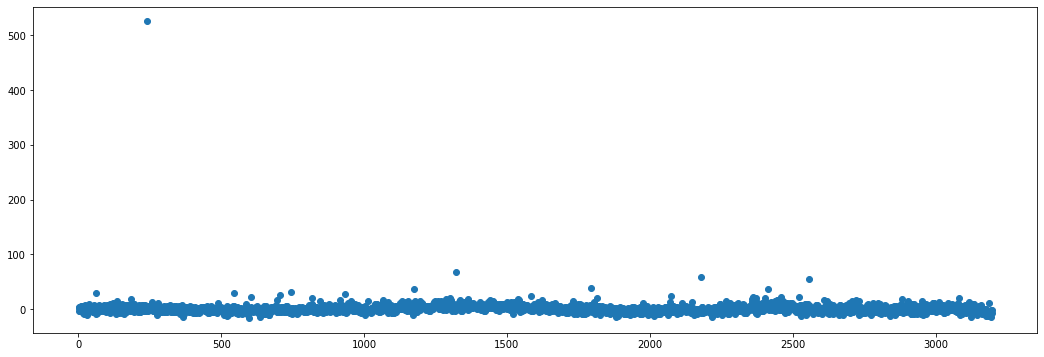

In [ ]:
# Student Action: Create a scatter plot for the second-last star, i.e., 'star_5085' in the DataFrame.
plt.figure(figsize = (18,6))
plt.scatter(x_value,star_5085[1: ])
plt.show()

There is no clear periodic downward-peak pattern in the `FLUX` values for the second-last star.

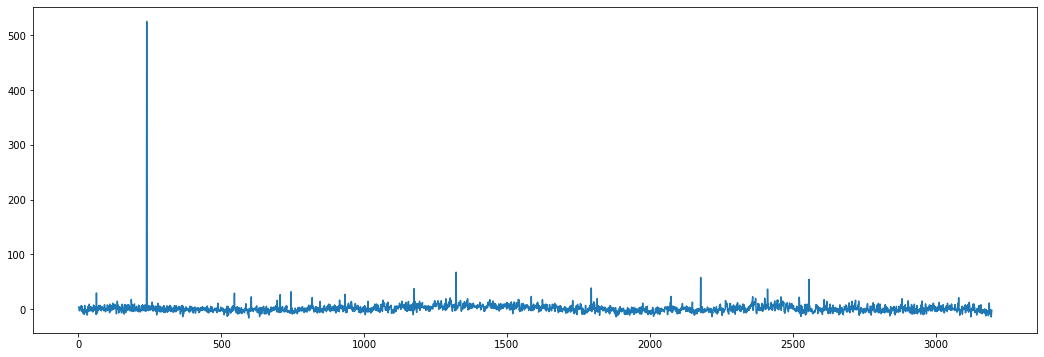

In [ ]:
# Student Action: Create a line plot for the second-last star in the DataFrame.
plt.figure(figsize = (18,6))
plt.plot(x_value,star_5085[1: ])
plt.show()

In [ ]:
star_5085.head()

LABEL     1.00
FLUX.1    3.82
FLUX.2    2.09
FLUX.3   -3.29
FLUX.4   -2.88
Name: 5085, dtype: float64

The line-plot also confirms that there is no clear periodic downward-peak pattern in the `FLUX` values.

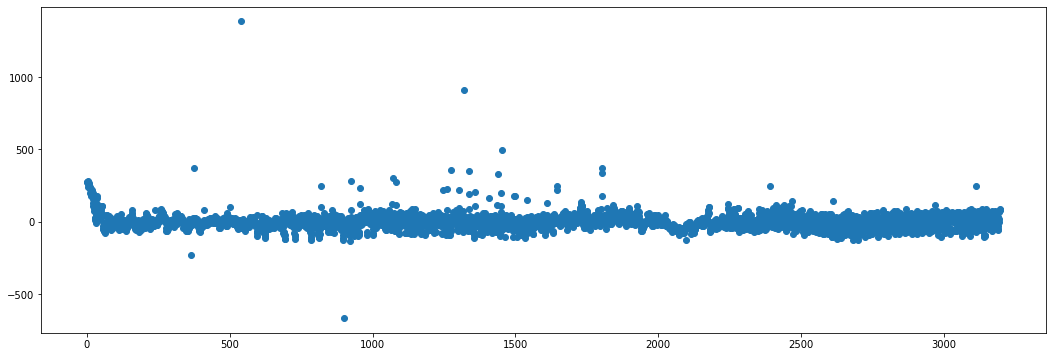

In [ ]:
# Student Action: Create a scatter plot for the third-last star, i.e., 'star_5084' in the DataFrame.
plt.figure(figsize = (18,6))
plt.scatter(x_value,star_5084[1: ])
plt.show()

No clear periodic downward-peak pattern for the third-last star.

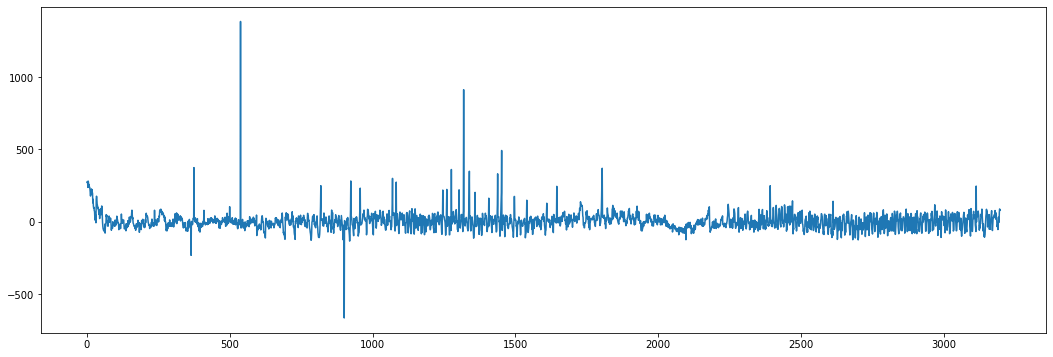

In [ ]:
# Student Action: Create a line plot for the third-last star in the DataFrame.
plt.figure(figsize = (18,6))
plt.plot(x_value,star_5084[1: ])
plt.show()

In [ ]:
star_5084.head()

LABEL       1.00
FLUX.1    273.39
FLUX.2    278.00
FLUX.3    261.73
FLUX.4    236.99
Name: 5084, dtype: float64

In [ ]:
exo_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
exo_train_df['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

So, this is how we create scatter and line plots for the numeric data.

**Note:** Now you can attempt **Project 4** on your own.

---